# MATH2970 Computer Assignment

**Author:** 510575452

In [218]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import minimize

## Exploring Data

In [220]:
stocks = pd.read_csv('data/project_data.csv', parse_dates=['Date'])
stocks.head()

,Date,BHP,CBA,CSL,NAB,WBC,ANZ,MQG,WES,GMG,FMG
0,2022-07-01,33.62,81.91,260.65,24.64,17.21,19.16,151.74,38.63,17.75,13.25
1,2022-07-04,33.49,82.59,266.04,24.85,17.43,19.40,154.43,39.60,18.25,13.31
2,2022-07-05,33.57,82.39,270.05,24.77,17.43,19.33,155.85,39.82,18.08,13.50
3,2022-07-06,31.69,83.09,277.01,25.22,17.59,19.51,156.75,40.47,18.77,12.85
4,2022-07-07,32.68,84.06,277.85,25.22,17.72,19.86,157.67,41.04,18.69,13.41


## Question 1

In [275]:
BHP_return = (stocks['BHP']/stocks['BHP'].shift(1) - 1)
BHP_return = BHP_return[1:]
BHP_return_mean = np.mean(BHP_return)

CBA_return = (stocks['CBA']/stocks['CBA'].shift(1) - 1)
CBA_return = CBA_return[1:]
CBA_return_mean = np.mean(CBA_return)

CSL_return = (stocks['CSL']/stocks['CSL'].shift(1) - 1)
CSL_return = CSL_return[1:]
CSL_return_mean = np.mean(CSL_return)

NAB_return = (stocks['NAB']/stocks['NAB'].shift(1) - 1)
NAB_return = NAB_return[1:]
NAB_return_mean = np.mean(NAB_return)

WBC_return = (stocks['WBC']/stocks['WBC'].shift(1) - 1)
WBC_return = WBC_return[1:]
WBC_return_mean = np.mean(WBC_return)

ANZ_return = (stocks['ANZ']/stocks['ANZ'].shift(1) - 1)
ANZ_return = ANZ_return[1:]
ANZ_return_mean = np.mean(ANZ_return)

MQG_return = (stocks['MQG']/stocks['MQG'].shift(1) - 1)
MQG_return = MQG_return[1:]
MQG_return_mean = np.mean(MQG_return)

WES_return = (stocks['WES']/stocks['WES'].shift(1) - 1)
WES_return = WES_return[1:]
WES_return_mean = np.mean(WES_return)

GMG_return = (stocks['GMG']/stocks['GMG'].shift(1) - 1)
GMG_return = GMG_return[1:]
GMG_return_mean = np.mean(GMG_return)

FMG_return = (stocks['FMG']/stocks['FMG'].shift(1) - 1)
FMG_return = FMG_return[1:]
FMG_return_mean = np.mean(FMG_return)


# Calculate the expected returns
r = pd.DataFrame([BHP_return, CBA_return, CSL_return, NAB_return, WBC_return, ANZ_return, MQG_return, WES_return, GMG_return, FMG_return]).T
r = r.mean()
r = r.to_numpy().round(6)
print(r)

# Calculate the covariance matrix
C = np.cov([BHP_return, CBA_return, CSL_return, NAB_return, WBC_return, ANZ_return, MQG_return, WES_return, GMG_return, FMG_return]).round(6)

print(C)


[0.000529 0.000894 0.000294 0.000826 0.000974 0.000828 0.000686 0.001077
 0.001472 0.001064]
[[2.24e-04 3.80e-05 4.00e-06 3.50e-05 3.60e-05 3.40e-05 7.40e-05 4.60e-05
  5.20e-05 2.30e-04]
 [3.80e-05 1.06e-04 4.10e-05 9.10e-05 9.00e-05 8.00e-05 7.70e-05 6.30e-05
  7.50e-05 4.00e-05]
 [4.00e-06 4.10e-05 1.23e-04 3.10e-05 2.90e-05 2.90e-05 4.50e-05 5.10e-05
  6.40e-05 5.00e-06]
 [3.50e-05 9.10e-05 3.10e-05 1.20e-04 9.90e-05 8.90e-05 8.10e-05 5.90e-05
  6.60e-05 4.00e-05]
 [3.60e-05 9.00e-05 2.90e-05 9.90e-05 1.26e-04 9.50e-05 7.90e-05 6.10e-05
  6.60e-05 4.40e-05]
 [3.40e-05 8.00e-05 2.90e-05 8.90e-05 9.50e-05 1.15e-04 7.80e-05 5.80e-05
  6.80e-05 4.30e-05]
 [7.40e-05 7.70e-05 4.50e-05 8.10e-05 7.90e-05 7.80e-05 1.85e-04 8.60e-05
  1.13e-04 9.60e-05]
 [4.60e-05 6.30e-05 5.10e-05 5.90e-05 6.10e-05 5.80e-05 8.60e-05 1.35e-04
  1.13e-04 4.80e-05]
 [5.20e-05 7.50e-05 6.40e-05 6.60e-05 6.60e-05 6.80e-05 1.13e-04 1.13e-04
  2.79e-04 7.50e-05]
 [2.30e-04 4.00e-05 5.00e-06 4.00e-05 4.40e-05 4.30e

## Question 2

Define constraints:

$a = \textbf{e}^TC^{-1}\textbf{e}$


$b = \textbf{r}^TC^{-1}\textbf{e}$


$c = \textbf{r}^TC^{-1}\textbf{r}$


$d = ac-b^2$


If $C$ is invertible, the solution to


\begin{equation}
\begin{aligned}
    \min_{x \in \mathbb{R}^n} \quad & Z(x) = -tx^T r + \frac{1}{2} x^T C x \\
    \text{s.t.} \quad & x^T e = 1
\end{aligned}
\end{equation}


is $\textbf{x}(t) = \alpha + t\beta$


In [276]:
e = np.ones(len(r))

C_inverse = np.linalg.inv(C)

a = e.T @ C_inverse @ e
b = r.T @ C_inverse @ e
c = r.T @ C_inverse @ r
d = (a*c) - (b**2)

alpha = (1/a) * (C_inverse @ e) 
beta = (C_inverse @ r) - ((b/a) * (C_inverse @ e))

print(f'x(t) = {alpha} + t{beta}')

x(t) = [ 0.20916302  0.05544382  0.3589362   0.10993805  0.05130531  0.20014944
 -0.05543784  0.1156983  -0.03130631 -0.01388999] + t[-4.04536855  2.80243309 -5.59801604 -1.81357726  3.40522874 -1.71209597
 -2.84146853  3.76686675  3.36565366  2.67034411]


# Question 3

## Part a

In [288]:
t = 0.06

investment = 100000

x = alpha + t*beta

print('Optimal Investment Allocation:')

for stock in range(len(x)):
    print(f'{stocks.columns[stock+1]} = ${x[stock]*investment:.2f}')

portfolio_mean = (b + d*t)/a * 100000
portfolio_std = np.sqrt(1+d*t**2)/np.sqrt(a) * 100000


print(f'Mean Portfolio Return: {portfolio_mean:.6f}')
print(f'Portfolio Standard Deviation: {portfolio_std:.6f}')

Optimal Investment Allocation:
BHP = $-3355.91
CBA = $22358.98
CSL = $2305.52
NAB = $112.34
WBC = $25561.90
ANZ = $9742.37
MQG = $-22592.59
WES = $34171.03
GMG = $17063.29
FMG = $14633.07
Mean Portfolio Return: 113.938670
Portfolio Standard Deviation: 958.006912


# Question 4

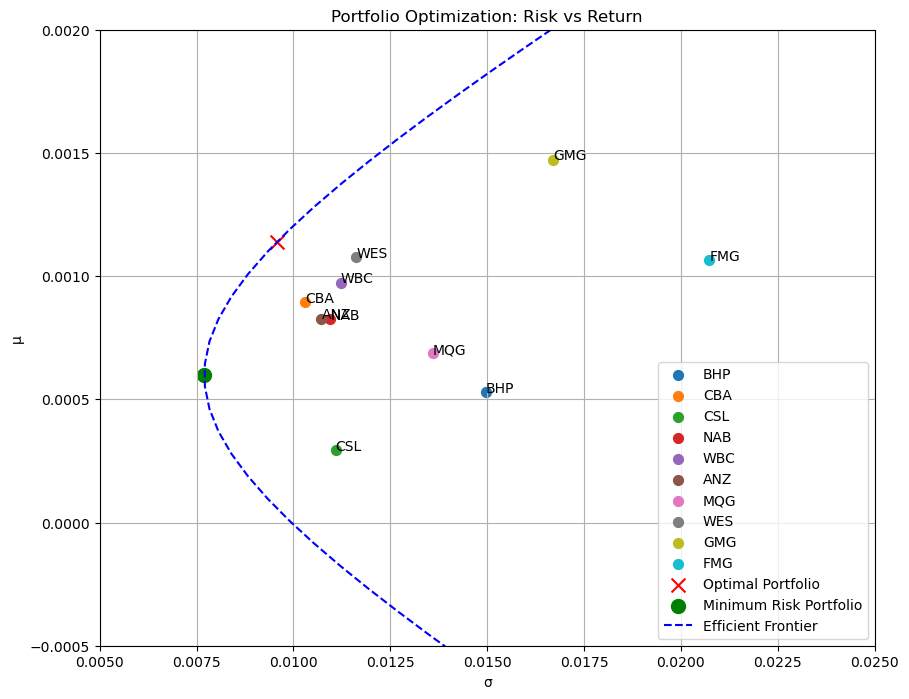

In [336]:
asset_risks = np.sqrt(np.diag(C))

plt.figure(figsize=(10, 8))

# Plot the 10 assets
for i in range(len(r)):
    plt.scatter(asset_risks[i], r[i], label=stocks.columns[i+1], s=50)
    plt.text(asset_risks[i], r[i], stocks.columns[i+1])


# Plot the optimal portfolio
optimal_risk = np.sqrt(x.T @ C @ x)
optimal_return = x.T @ r
plt.scatter(optimal_risk, optimal_return, color='red',
            label='Optimal Portfolio', s=100, marker='x')

# Plot the minimum risk portfolio
minimum_risk_portfolio = alpha  
min_risk_std = np.sqrt(minimum_risk_portfolio.T @ C @ minimum_risk_portfolio)
min_risk_return = minimum_risk_portfolio.T @ r
plt.scatter(min_risk_std, min_risk_return, color='green',
            label='Minimum Risk Portfolio', s=100, marker='o')

# Plot efficient frontier
efficient_frontier = []
risk_values = []

for i in np.linspace(-0.5, 0.5, 100) :
    x_t = alpha + i * beta  
    portfolio_mean = x_t.T @ r  
    portfolio_std = np.sqrt(x_t.T @ C @ x_t)  
    efficient_frontier.append(portfolio_mean)
    risk_values.append(portfolio_std)

plt.plot(risk_values, efficient_frontier,
         label='Efficient Frontier', color='blue', linestyle='--')

plt.xlabel('σ')
plt.ylabel('μ')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlim(0.005, 0.025)
plt.ylim(-0.0005, 0.002)
plt.legend()
plt.grid(True)
plt.show()